# INTERNSAVY TASK- 4

### Cricket Player Performance Prediction

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
Ground_Avg = 'C:/Users/91932/Desktop/InternSavy/Ground_Averages.csv'
Ground_Match_Result =  'C:/Users/91932/Desktop/InternSavy/ODI_Match_Results.csv'
Ground_Match_Total = 'C:/Users/91932/Desktop/InternSavy/ODI_Match_Totals.csv'

In [6]:
#Reading the dataset into 3 different variables
df1 = pd.read_csv(Ground_Avg)
df2 = pd.read_csv(Ground_Match_Result)
df3 = pd.read_csv(Ground_Match_Total)

### Understanding and cleansing the dataset

In [7]:
print(df1.head())
print("-----------------------------------------------------------------------------------")
print(df1.info())
print("-----------------------------------------------------------------------------------")
print(df1.shape)
print("-----------------------------------------------------------------------------------")

                                              Ground       Span  Mat  Won  \
0                      Eden Gardens, Kolkata - India  2013-2017    4    4   
1                    Feroz Shah Kotla, Delhi - India  2013-2019    4    4   
2               Melbourne Cricket Ground - Australia  2013-2019   15   15   
3  Saurashtra Cricket Association Stadium, Rajkot...  2013-2015    2    2   
4                          Adelaide Oval - Australia  2013-2019   10   10   

   Tied  NR  Runs  Wkts  Balls    Ave   RPO  
0     0   0  2161    72   2297  30.01  5.64  
1     0   0  1789    75   2331  23.85  4.60  
2     0   0  7656   217   8482  35.28  5.41  
3     0   0  1163    26   1200  44.73  5.81  
4     0   0  4863   157   5645  30.97  5.16  
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  ----- 

In [8]:
print(df2.head())
print("-----------------------------------------------------------------------------------")
print(df2.info())
print("-----------------------------------------------------------------------------------")
print(df2.shape)
print("-----------------------------------------------------------------------------------")

   Unnamed: 0 Result    Margin  BR  Toss  Bat   Opposition     Ground  \
0         418    won   85 runs NaN  lost  1st      v India    Kolkata   
1         692   lost   85 runs NaN   won  2nd   v Pakistan    Kolkata   
2         419   lost   10 runs NaN  lost  2nd      v India      Delhi   
3         693    won   10 runs NaN   won  1st   v Pakistan      Delhi   
4         121   lost  107 runs NaN  lost  2nd  v Australia  Melbourne   

    Start Date    Match_ID   Country  Country_ID  
0   3 Jan 2013  ODI # 3315  Pakistan           7  
1   3 Jan 2013  ODI # 3315     India           6  
2   6 Jan 2013  ODI # 3316  Pakistan           7  
3   6 Jan 2013  ODI # 3316     India           6  
4  11 Jan 2013  ODI # 3317  SriLanka           8  
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ------

In [9]:
print(df3.head())
print("-----------------------------------------------------------------------------------")
print(df3.info())
print("-----------------------------------------------------------------------------------")
print(df3.shape)
print("-----------------------------------------------------------------------------------")

   Unnamed: 0 Score  Overs   RPO  Target  Inns Result   Opposition     Ground  \
0         412   250   48.3  5.15     NaN     1    won      v India    Kolkata   
1         680   165   48.0  3.43   251.0     2   lost   v Pakistan    Kolkata   
2         413   157   48.5  3.21   168.0     2   lost      v India      Delhi   
3         681   167   43.4  3.82     NaN     1    won   v Pakistan      Delhi   
4         117   198   40.0  4.95   306.0     2   lost  v Australia  Melbourne   

    Start Date    Match_ID   Country  Country_ID  
0   3 Jan 2013  ODI # 3315  Pakistan           7  
1   3 Jan 2013  ODI # 3315     India           6  
2   6 Jan 2013  ODI # 3316  Pakistan           7  
3   6 Jan 2013  ODI # 3316     India           6  
4  11 Jan 2013  ODI # 3317  SriLanka           8  
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
 #   Column     

We observe that df2 and df3 are more or less the same. They have some common columns. We will group these two DataFrames into one. This will help us analyse better and make the dataset more powerful.

In [10]:
common = set.intersection(set(df2['Start Date']), set(df3['Start Date']))
df = pd.concat([
    df2[df2['Start Date'].isin(common)],
    df3[df3['Start Date'].isin(common)]]).sort_values(by='Start Date')

In [11]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,1 Aug 2013,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [12]:
#understanding the dataframe better, to see how many null columns etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2597 non-null   int64  
 1   Result      2597 non-null   object 
 2   Margin      1301 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1301 non-null   object 
 5   Bat         1301 non-null   object 
 6   Opposition  2597 non-null   object 
 7   Ground      2597 non-null   object 
 8   Start Date  2597 non-null   object 
 9   Match_ID    2597 non-null   object 
 10  Country     2597 non-null   object 
 11  Country_ID  2597 non-null   int64  
 12  Score       1296 non-null   object 
 13  Overs       1296 non-null   float64
 14  RPO         1296 non-null   object 
 15  Target      620 non-null    float64
 16  Inns        1296 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 365.2+ KB


In [13]:
#Converting Start Date column to Time and Date datatype 
df['Start Date']= pd.to_datetime(df['Start Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2597 non-null   int64         
 1   Result      2597 non-null   object        
 2   Margin      1301 non-null   object        
 3   BR          606 non-null    float64       
 4   Toss        1301 non-null   object        
 5   Bat         1301 non-null   object        
 6   Opposition  2597 non-null   object        
 7   Ground      2597 non-null   object        
 8   Start Date  2597 non-null   datetime64[ns]
 9   Match_ID    2597 non-null   object        
 10  Country     2597 non-null   object        
 11  Country_ID  2597 non-null   int64         
 12  Score       1296 non-null   object        
 13  Overs       1296 non-null   float64       
 14  RPO         1296 non-null   object        
 15  Target      620 non-null    float64       
 16  Inns        1296 non-nu

In [14]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,2013-08-01,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


Things we can do with df:
Gather data induvidually based on Opposition, Ground
1. Result vs Toss
2. Margin vs Bat
3. Target, result, ground - Lowest and Highest
4. How many times has 'Country' won against 'Opposition' and for what score, RPO, Target

## Problem 1

In [15]:
#Gruping required columns for problem 1  in one dataframe
#The null values have reduced and hence the null columns can be dropped
prob1_var = df[['Toss', 'Result', 'Ground']]
prob1_var.dropna()

,Toss,Result,Ground
891,lost,won,Colombo (SSC)
892,won,lost,Colombo (SSC)
148,won,won,Bulawayo
1135,won,lost,Dambulla
1136,lost,won,Dambulla
...,...,...,...
1202,lost,won,Abu Dhabi
792,won,lost,Dhaka
793,lost,won,Dhaka
791,won,lost,Port Elizabeth


In [16]:
#Grouping the data together according to the required Stadium
prob1 = prob1_var.query('Ground == "The Oval"')
prob1.info

<bound method DataFrame.info of       Toss Result    Ground
915    won    won  The Oval
916   lost   lost  The Oval
894    NaN   lost  The Oval
893    NaN    won  The Oval
91    lost   lost  The Oval
...    ...    ...       ...
929    won    won  The Oval
1302  lost    n/r  The Oval
1279   NaN    n/r  The Oval
1278   NaN    n/r  The Oval
1303   won    n/r  The Oval

[68 rows x 3 columns]>

In [17]:
#Gathering only the winning results from the dataframe
tempvar = prob1.loc[prob1['Result']=='won']
tvar = tempvar['Toss'].value_counts()
tvar
#this tells us that, at the oval, we More number of teams have won the match if they have won the toss

won     10
lost     5
Name: Toss, dtype: int64

Similar results can be obtained for each team instead of each Stadium if the query line is replaced with team and opponent data

## Problem 2 - Margin vs Bat

In [18]:
#We will load the data again, so we don't have to scroll up all the time
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,2013-08-01,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [19]:
#We will again group the data according to Birmingham 
prob2 = df[['Bat', 'Ground', 'Opposition', 'Result']]
prob2.head()

,Bat,Ground,Opposition,Result
891,1st,Colombo (SSC),v Bangladesh,won
892,2nd,Colombo (SSC),v Sri Lanka,lost
870,NaN,Colombo (SSC),v Sri Lanka,lost
869,NaN,Colombo (SSC),v Bangladesh,won
148,2nd,Bulawayo,v Zimbabwe,won


In [20]:
#Dropping Null Values
prob2.dropna()
#Grouping According to one ground
prob2 = prob2.query('Ground == "Birmingham"')
prob2

,Bat,Ground,Opposition,Result
90,2nd,Birmingham,v South Africa,lost
88,NaN,Birmingham,v Pakistan,won
89,NaN,Birmingham,v South Africa,lost
89,1st,Birmingham,v Pakistan,won
935,2nd,Birmingham,v Australia,won
936,1st,Birmingham,v England,lost
914,NaN,Birmingham,v England,lost
913,NaN,Birmingham,v Australia,won
156,NaN,Birmingham,v Australia,n/r
157,NaN,Birmingham,v England,n/r


In [21]:
#Grouping according to whoever batted first
prob2_b1 = prob2.loc[prob2['Bat']=='1st']
prob2_b1['Result'].value_counts()

lost    7
won     5
n/r     3
Name: Result, dtype: int64

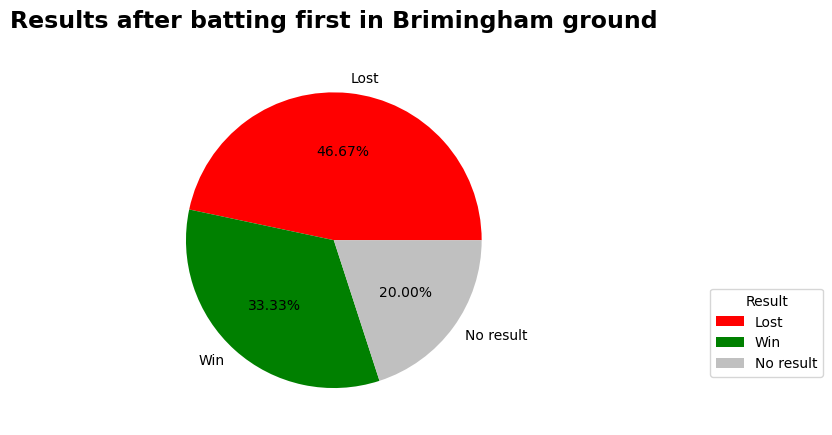

In [22]:
#plotting the graph
fig = figsize =(30, 20)
label = ['Lost', 'Win', 'No result']
colors = ['red', 'green', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting first in Brimingham ground', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5)) 

In [23]:
#Grouping the data according to second batting
prob2_b2 = prob2.loc[prob2['Bat']=='2nd']
#Counting how many of these second batters have won and lost
prob2_b2['Result'].value_counts()

won     7
lost    5
n/r     3
Name: Result, dtype: int64

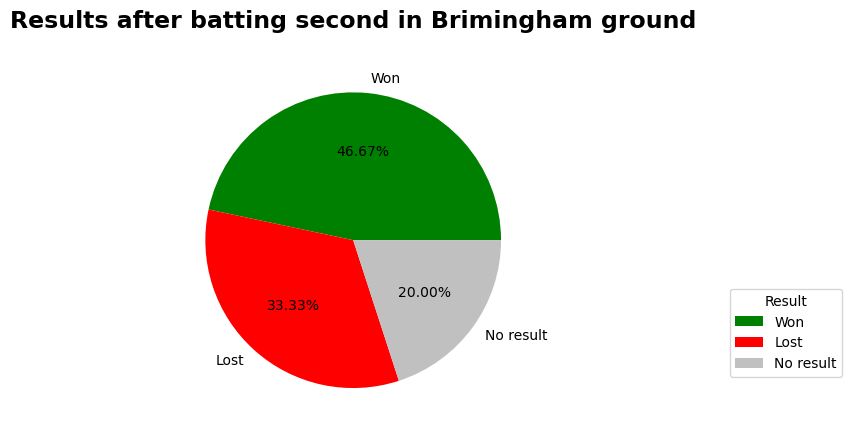

In [24]:
fig = figsize =(30, 20)
label = ['Won', 'Lost', 'No result']
colors = ['green', 'red', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting second in Brimingham ground', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))

Thus, we can predict that teams which have batted first have higher chances of winning than teams which have batted second.


## Problem 3 - Target, Result, Ground

In [25]:
#Grouping the data according to reqd columns
prob3 = df[['Target', 'Result', 'Ground']]
#Dropping null values
prob3 = prob3.dropna()
prob3

,Target,Result,Ground
870,281.0,lost,Colombo (SSC)
147,145.0,won,Bulawayo
1113,245.0,won,Dambulla
400,129.0,won,Dhaka
31,71.0,won,Perth
...,...,...,...
375,243.0,won,Hyderabad (Deccan)
1179,210.0,won,Abu Dhabi
1177,232.0,lost,Adelaide
770,168.0,won,Port Elizabeth


In [26]:
#Grouping according to Matches played at Oval
prob3g = prob3.query('Ground == "The Oval"')
#Grouping according to winners at Oval
prob3g = prob3g.loc[prob3g['Result']=='won']
#Mean score of the wiining team
mean_score = prob3g['Target'].mean()
prob3g

,Target,Result,Ground
893,306.0,won,The Oval
91,234.0,won,The Oval
916,192.0,won,The Oval
94,294.0,won,The Oval
1083,215.0,won,The Oval
105,176.0,won,The Oval
967,253.0,won,The Oval
718,308.0,won,The Oval
82,171.0,won,The Oval
907,322.0,won,The Oval


In [27]:
mean_score

247.1

In [28]:
print("The Average Score for this ground is: ")
print(prob3['Target'].mean())
print("The Highest Score for this ground is: ")
print(prob3g['Target'].max())
print("The Lowest Score for this ground is: ")
print(prob3['Target'].min())

The Average Score for this ground is: 
253.44032258064516
The Highest Score for this ground is: 
322.0
The Lowest Score for this ground is: 
68.0


## Problem 5 - Country Analysis

In [29]:
#Consider a country say India and Opposition as England
prob5 = df.query('Country == "India"')
prob5 = prob5.query('Opposition == "v England"')
prob5.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
6,694,lost,9 runs,NaN,lost,2nd,v England,Rajkot,2013-01-11,ODI # 3318,India,6,NaN,NaN,NaN,NaN,NaN
6,682,lost,NaN,NaN,NaN,NaN,v England,Rajkot,2013-01-11,ODI # 3318,India,6,316/9,50.0,6.32,326.0,2.0
1116,825,won,8 wickets,59.0,won,2nd,v England,Nottingham,2018-07-12,ODI # 4014,India,6,NaN,NaN,NaN,NaN,NaN
1093,809,won,NaN,NaN,NaN,NaN,v England,Nottingham,2018-07-12,ODI # 4014,India,6,269/2,40.1,6.69,269.0,2.0
1096,810,lost,NaN,NaN,NaN,NaN,v England,Lord's,2018-07-14,ODI # 4016,India,6,236,50.0,4.72,323.0,2.0


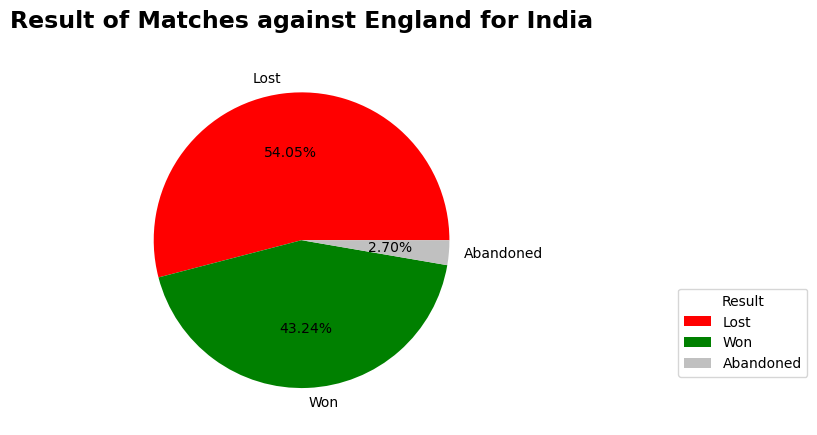

In [30]:
fig = figsize =(30, 20)
label = ['Lost', 'Won', 'Abandoned']
colors = ['red', 'Green', 'Silver']
plt.pie(prob5['Result'].value_counts(), labels=label, colors=colors,  autopct='%1.2f%%')
plt.title('Result of Matches against England for India', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))